<a href="https://colab.research.google.com/github/Fcazarez/RRC3_NNandDL_FinalProject_DeepLearning/blob/main/Copy_of_NNandDL_FinalProject_FelixCazarez_0378585.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP-3704 (241552) Neural Networks and Deep Learning**
# **Project: Applied Deep Learning**
# **Felix Cazarez - 0378585**
# Tweet Sentiment analysis benchmarking airlines in US

# **`Introduction:`**

In the digital age, social media, especially Twitter, stands out as a dynamic force capable of shaping and predicting human behavior. With its expansive user base and real-time updates, Twitter serves as a rich source of information with multifaceted applications. This project aims to explore the following key aspects: 1. **Trend Recognition**, **Public Sentiment Analysis**, **Enhanced Customer Engagement**, **Optimizing Campaigns in Real Time**, **Effective Crisis Management**. The object of study in this project is `Customer engagement sentiment Analysis`. By scrutinizing how different brands resonate with their audiences on Twitter, organizations can gain a competitive edge through informed strategic decisions and benchmarking.

**About the Dataset:**
* The dataset provides a rich source of information, including tweet ID, sentiment labels (positive, negative, or neutral), airline details, retweet count, text content, and more.
* [Kaggle Link](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)


# 📚**`Summary`**

This project centers around leveraging the Twitter US Airline Sentiment dataset, comprising over 14,000 tweets about US airlines, to conduct a comprehensive sentiment analysis. The primary objective is to gain insights into human purchasing habits, particularly how they are shaped by sentiments expressed on Twitter. The focus is on benchmarking the sentiment trends across the six major airlines, allowing targeted carriers to formulate strategic plans that positively influence customer perceptions and purchasing behaviour.

The project unfolds with the goal of classifying tweets as either positive or negative, employing various machine-learning models. Notably, both Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) models are employed for comparison. The preprocessing steps encompass text-cleaning techniques such as tokenization, stop-word removal, and emoticon handling.

Key analysis points focus on evaluating model performance metrics, including accuracy and loss. Among the models considered, the LSTM model emerges as the most effective, demonstrating superior accuracy and minimal loss compared to its counterparts. Consequently, GRU is selected as the preferred model for sentiment analysis.

Moving forward, the project aims to fine-tune hyperparameters and explore advanced techniques to further enhance the model's ability to navigate the nuanced landscape of sentiment classification within Twitter data. (196 words)


> #  - **`Import Necessary Dependencies`**.

In [ ]:
#!pip install autocorrect
#!pip install emoji
#!pip install -U textblob
#!pip install wordcloud
#!pip install gensim
#!pip install pyLDAvis
#!pip install spacy

In [ ]:
import emoji
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import string


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from autocorrect import Speller

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob

from wordcloud import WordCloud
from gensim.models import Word2Vec
import ast


from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (
    Embedding,
    SpatialDropout1D,
    SimpleRNN,
    LSTM,
    GRU,
    Dropout,
    Dense,
    Bidirectional
    )

[nltk_data] Downloading package punkt to C:\Users\Felix
[nltk_data]     C\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Felix
[nltk_data]     C\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Felix
[nltk_data]     C\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


> #  - **`Load and read the data`**.

In [ ]:
# import files
url = 'https://raw.githubusercontent.com/Fcazarez/RRC3_NNandDL_FinalProject_DeepLearning/main/TweetsAirline.csv'
df = pd.read_csv(url)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
unique_airlines = df['airline'].unique()
print("Number of unique airlines:", unique_airlines)
# Assuming df is your DataFrame
airline_counts = df['airline'].value_counts()
print(airline_counts)



Number of unique airlines: ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


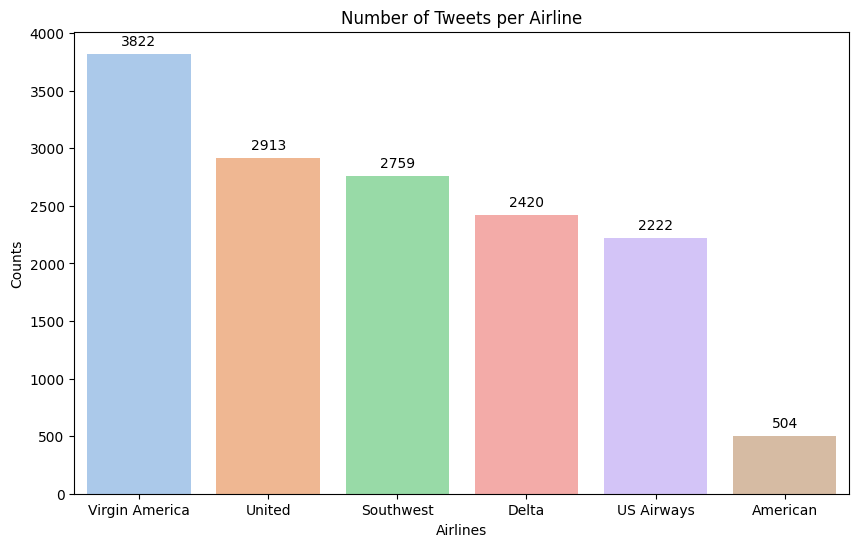

In [ ]:
# Set a color palette
colors = sns.color_palette("pastel", len(unique_airlines))

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_airlines, y=airline_counts, palette=colors)

# Add a text label above each bar displaying its height
for i, count in enumerate(airline_counts):
    plt.text(i, count + 50, count, ha='center', va='bottom')

plt.xlabel('Airlines')
plt.ylabel('Counts')
plt.title('Number of Tweets per Airline')
plt.show()


> #  - **`Clean the data`**.

In [ ]:
for airline in unique_airlines:
    df_airline = df[df['airline'] == airline]
    print('=' * 60)
    print('Dataset for', airline)
    print('=' * 60)
    print(df_airline[['tweet_id', 'text']].sample(5))



Dataset for Virgin America
               tweet_id                                               text
451  567908796917420032  @VirginAmerica I am all about the in flight ar...
39   570035876845084672  @VirginAmerica Your chat support is not workin...
154  569575003248676864  @VirginAmerica  - Is Flight 713 from Love Fiel...
379  568434482270707712  @VirginAmerica Just bought tix for ATX - Dalla...
45   570012257549070337  @VirginAmerica I'm #elevategold for a good rea...
Dataset for United
                tweet_id                                               text
3297  568544738032242688  @united ok thanks. I sent you a DM too. You ca...
1605  569647347547955200  @united flight 3870 to Newark, stuck in the ru...
3391  568469807189790720  @united your Airbus a320 seats are awful. They...
2155  569337830184345601  @united not completely.  Our flight was change...
2690  568954048038055936  @united never fails, flying FC order ravioli g...
Dataset for Southwest
                tweet_id  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Drop NAN

In [ ]:
# check Nan values
print('Number of NaN values in general DataFrame: ', df.isna().sum())


Number of NaN values in general DataFrame:  tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  1189
negativereason_confidence        822
airline                            0
airline_sentiment_gold          3814
name                               0
negativereason_gold             3815
retweet_count                      0
text                               0
tweet_coord                     3503
tweet_created                      0
tweet_location                  1189
user_timezone                   1295
dtype: int64


Drop columns which not are adding value

In [ ]:
columns_to_drop = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB
None


Check duplicates

In [ ]:
# check duplicates
print('Number of duplicates in General Dataset: ', df.duplicated().sum())


Number of duplicates in General Dataset:  39


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Print updated information
print("Number of duplicates in General Dataset after dropping: ", df.duplicated().sum())
print(df.info())


Number of duplicates in General Dataset after dropping:  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14601 entries, 0 to 14639
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14601 non-null  int64  
 1   airline_sentiment             14601 non-null  object 
 2   airline_sentiment_confidence  14601 non-null  float64
 3   negativereason                9157 non-null   object 
 4   negativereason_confidence     10501 non-null  float64
 5   airline                       14601 non-null  object 
 6   name                          14601 non-null  object 
 7   retweet_count                 14601 non-null  int64  
 8   text                          14601 non-null  object 
 9   tweet_created                 14601 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB
None


Check for missing values

In [ ]:
# check missing or null values
print("Total missing values in General Dataframe:", df.isnull().sum())


Total missing values in General Dataframe: tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5444
negativereason_confidence       4100
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
dtype: int64


In [ ]:
# instantiate stopwords, lemmatizer and speller
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
spell = Speller(lang='en')

Create a function which clean the data

In [ ]:
# clean text
def clean_text(text):
    # replace emojis with its meaning
    text = text.apply(lambda x: emoji.demojize(x))
    # remove URLs
    text = text.apply(lambda x: re.sub(r'http\S+', '', x))
    # remove html tags
    text = text.apply(lambda x: re.sub(r'<.*?>', '', x))
    # remove punctuation, inlcuding @ for mentions and # for hashtags
    text = text.apply(lambda x: re.sub(r'[^\w\s]|_', ' ', x))
    # normalize case
    text = text.apply(lambda x: x.lower())
    # remove stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    # check if the word is spelled correctly
    text = text.apply(lambda x: spell(x))
    # lemmatize the text
    text = text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    # tokenize the text
    text = text.apply(lambda x: word_tokenize(x))
    return text

>  `Cleanning summary`.

  1. Replace emojis.
  2. Drop URLs from the text.
  3. Drop HTML tags.
  4. Drop punctuation, including @ for mentions and # for hashtags.
  5. Change text to lowercase.
  6. Remove stopwords.
  7. Check and correct spelling of words.
  8. Lemmatize the text - reduce words to their base or root form.
  9. Tokenize the text - split it into individual words.


In [ ]:
# clean the text using function

df['clean_text'] = clean_text(df['text'])
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,"[virginamerica, dhepburn, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,"[virginamerica, plus, added, commercial, exper..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,"[virginamerica, today, must, mean, need, take,..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,"[virginamerica, really, aggressive, blast, obn..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,"[virginamerica, really, big, bad, thing]"


Save the clean data in my computer

In [ ]:
# Save cleaned DataFrames to CSV files for future use
df.to_csv('cleaned_airline_data.csv', index=False)
df.to_csv('D:/RRC_DSML/Third term/COMP 3704 Neural Networks/final project/cleaned_airline_data.csv', index=False)


Recover the data from github

In [ ]:
df_clean = pd.read_csv('https://raw.githubusercontent.com/Fcazarez/RRC3_NNandDL_FinalProject_DeepLearning/main/cleaned_airline_data.csv')
print(df_clean.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @Virgin

> #  - **`Data Analysis`**.

*Comments:*

The polarity score is a float within the range [-1.0, 1.0] where -1 means negative sentiment, 0 means neutral sentiment, and 1 means positive sentiment.

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [ ]:
print("Tenth element in the text: \n", df_clean['clean_text'][9])
# analyse the sentiment in a randon tweet
test_tweet = TextBlob(df_clean['text'][9])
test_tweet.sentiment

Tenth element in the text: 
 ['virginamerica', 'amazing', 'arrived', 'hour', 'early', 'good']


Sentiment(polarity=0.4666666666666666, subjectivity=0.6)

In [ ]:
# calculate sentiment for all tweets
def calculate_sentiment(review):
  analysis = TextBlob(review).sentiment
  return pd.Series({'Sentiment Polarity': analysis.polarity, 'Sentiment Subjectivity': analysis.subjectivity})

In [ ]:
# apply the sentiment columns to clean general df
df_clean[['polarity', 'subjectivity']] = df_clean['clean_text'].apply(calculate_sentiment)
print(df_clean.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @Virgin

In [ ]:
# new column opinion label based on the sentiment polarity
df_clean["opinion_label"] = np.where(df_clean["polarity"] > 0, "positive", "negative")
df_clean.loc[df_clean["polarity"] == 0, "opinion_label"] = "neutral"

print(df_clean.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @Virgin

> #  - ** `Premodelling visualizations`**.

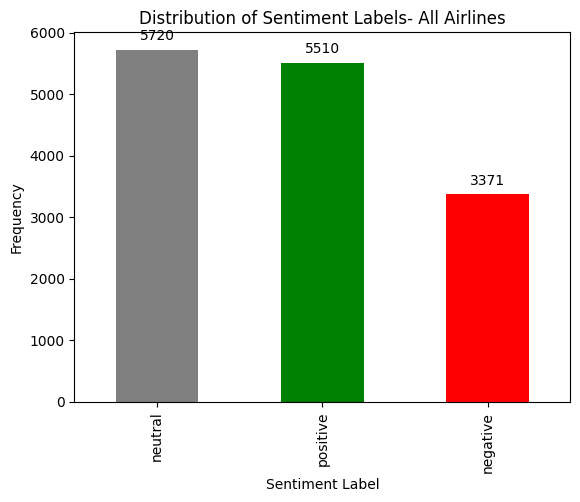

In [ ]:
# Plot labels
ax = df_clean['opinion_label'].value_counts().plot(kind='bar', color=['grey', 'green', 'red'])
plt.title('Distribution of Sentiment Labels- All Airlines')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
df_virgin = df_clean[df_clean['airline'] == 'Virgin America']
df_united = df_clean[df_clean['airline'] == 'United']
df_usairways = df_clean[df_clean['airline'] == 'US Airways']
df_southwest = df_clean[df_clean['airline'] == 'Southwest']
df_delta = df_clean[df_clean['airline'] == 'Delta']
df_american = df_clean[df_clean['airline'] == 'American']


In [ ]:
display(df_virgin.sample(2))
display(df_united.sample(2))
display(df_usairways.sample(2))
display(df_southwest.sample(2))
display(df_delta.sample(2))
display(df_american.sample(2))


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,clean_text,polarity,subjectivity,opinion_label
16,570277724385734656,positive,1.0,NaN,NaN,Virgin America,ItzBrianHunty,0,@VirginAmerica So excited for my first cross c...,2015-02-24 09:42:59 -0800,"['virginamerica', 'excited', 'first', 'cross',...",0.35625,0.458333,positive
319,568689188377403392,neutral,1.0,NaN,NaN,Virgin America,BFPTravel,0,@virginamerica may start service to Hawaii fro...,2015-02-20 00:30:42 -0800,"['virginamerica', 'may', 'start', 'service', '...",0.00000,0.000000,neutral


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,clean_text,polarity,subjectivity,opinion_label
2566,569058014650433536,negative,1.0000,Flight Attendant Complaints,1.0000,United,_SamanthaAkira,0,@united no. U guys suck. I'll never fly with u...,2015-02-21 00:56:17 -0800,"['united', 'u', 'guy', 'suck', 'never', 'fly',...",-0.400,0.900000,negative
2063,569407352299847680,negative,0.7029,Late Flight,0.3619,United,MarkGilden,0,@united - you sure missed the mark on tonight'...,2015-02-22 00:04:26 -0800,"['united', 'sure', 'missed', 'mark', 'tonight'...",0.275,0.521296,positive


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,clean_text,polarity,subjectivity,opinion_label
9462,569923163259318274,negative,1.0000,Customer Service Issue,1.0000,US Airways,electromail,0,"@USAirways Aye, and nothing to do with an auto...",2015-02-23 10:14:05 -0800,"['airway', 'aye', 'nothing', 'automated', 'sys...",0.0,0.100000,neutral
10651,569009996668624896,negative,0.6633,Flight Booking Problems,0.6633,US Airways,ben0fficial,0,@USAirways so you're not honoring miles with @...,2015-02-20 21:45:29 -0800,"['airway', 'honoring', 'mile', 'united', 'trav...",0.0,0.066667,neutral


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,clean_text,polarity,subjectivity,opinion_label
5613,568860857326637056,neutral,0.624,NaN,NaN,Southwest,Normthompsonsr,0,@SouthwestAir when is the next flight with fr...,2015-02-20 11:52:51 -0800,"['southwestair', 'next', 'flight', 'free', 'co...",0.2,0.4,positive
5915,568491142410571778,negative,1.000,Customer Service Issue,1.0,Southwest,dahriowonder,0,@SouthwestAir Yes. Please train your customer ...,2015-02-19 11:23:45 -0800,"['southwestair', 'yes', 'please', 'train', 'cu...",0.0,0.6,neutral


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,clean_text,polarity,subjectivity,opinion_label
7776,569253874445492225,neutral,0.6667,NaN,0.0,Delta,FruminousB,0,@JetBlue what's the status of flight 1272 dive...,2015-02-21 13:54:34 -0800,"['jetblue', 'status', 'flight', '1272', 'diver...",0.0,0.0,neutral
7199,569892141335334913,neutral,1.0000,NaN,NaN,Delta,brittanylevine,0,@JetBlue I believe you have to follow me so I ...,2015-02-23 08:10:49 -0800,"['jetblue', 'believe', 'follow', 'send', 'mess...",0.0,0.0,neutral


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,clean_text,polarity,subjectivity,opinion_label
12346,570209266264449026,negative,1.0,Can't Tell,0.6431,American,dwjudson,0,@AmericanAir Disappointing lack of kindness to...,2015-02-24 05:10:57 -0800,"['americana', 'disappointing', 'lack', 'kindne...",-0.60,0.7,negative
12847,569992310563450880,negative,1.0,Customer Service Issue,0.6638,American,SamuelMondo,0,@AmericanAir probs the worst customer service ...,2015-02-23 14:48:51 -0800,"['americana', 'probe', 'worst', 'customer', 's...",-0.65,0.6,negative


In [ ]:
#Split dataframes for each Airline:
for airline in unique_airlines:
    df_airline = df_clean[df_clean['airline'] == airline]
    print('=' * 60)
    print('Dataset for', airline)
    print('=' * 60)
    print(df_airline.sample(5))



Dataset for Virgin America
               tweet_id airline_sentiment  airline_sentiment_confidence  \
358  568491256508231680          positive                        1.0000   
37   570045393565691904          positive                        1.0000   
426  568101393111891968           neutral                        0.6559   
294  568838020041809920           neutral                        1.0000   
384  568406048777900032          positive                        1.0000   

    negativereason  negativereason_confidence         airline           name  \
358            NaN                        NaN  Virgin America   alexster4324   
37             NaN                        NaN  Virgin America      Nicsplace   
426            NaN                        0.0  Virgin America  PlantFoodDude   
294            NaN                        NaN  Virgin America    AirlineFuel   
384            NaN                        NaN  Virgin America         MarcSM   

     retweet_count                       

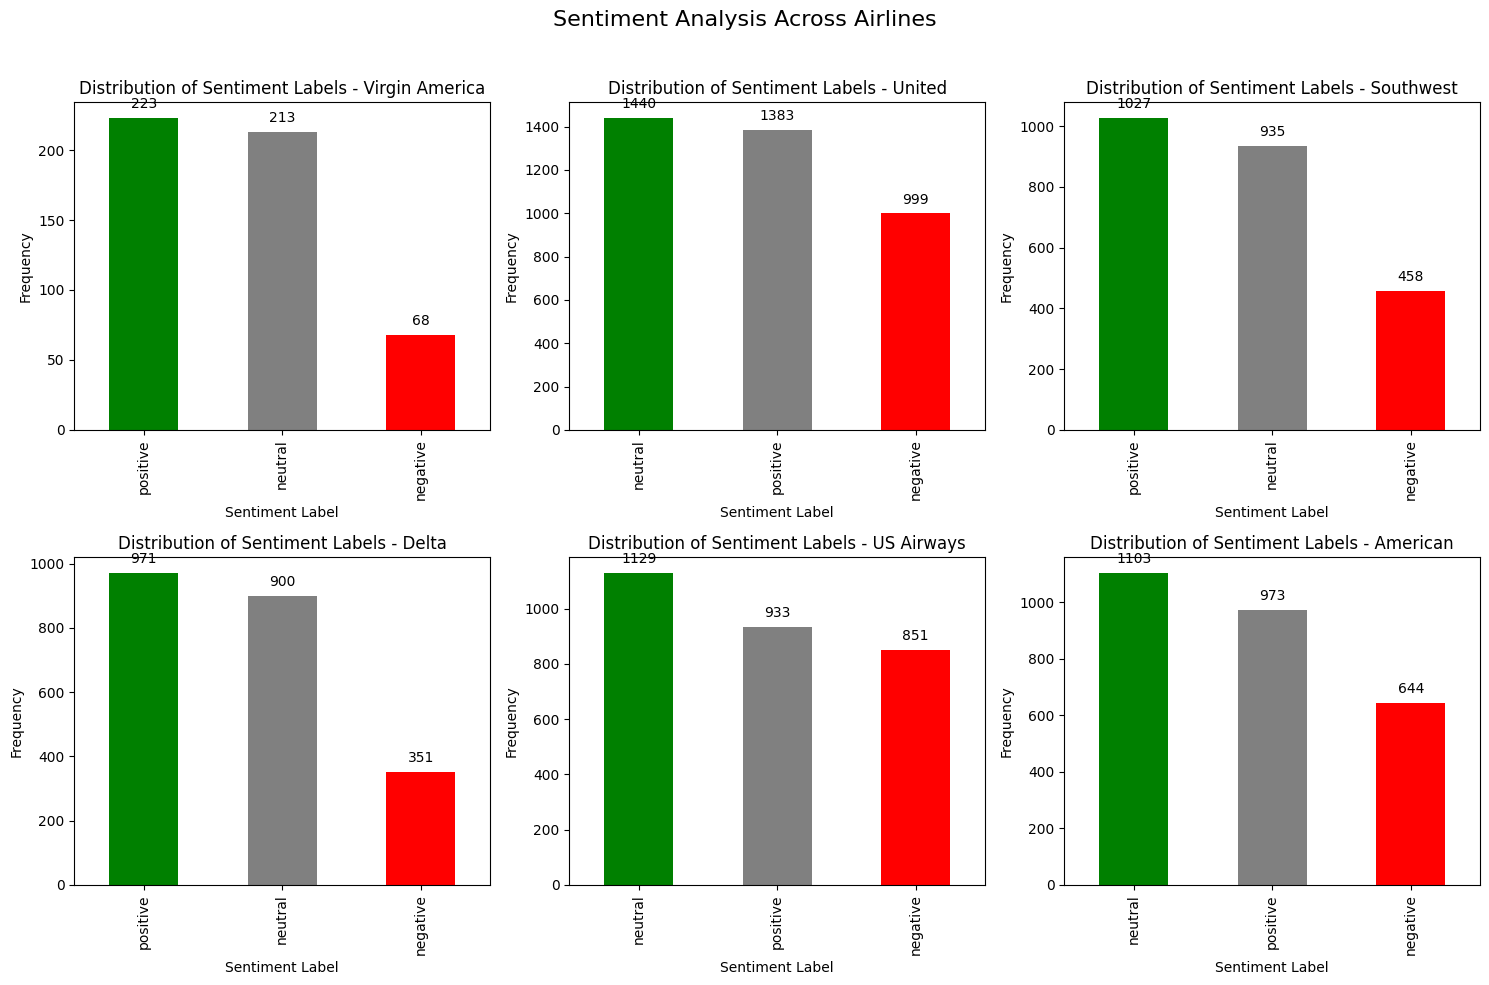

In [ ]:
import matplotlib.pyplot as plt

# Create a 2x3 grid for the 6 graphs
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sentiment Analysis Across Airlines', fontsize=16)

# Flatten the 2D array of axes to make indexing easier
axes = axes.flatten()

# Split dataframes for each Airline
for i, airline in enumerate(unique_airlines):
    df_airline = df_clean[df_clean['airline'] == airline]

    # Plot labels on the corresponding subplot
    ax = df_airline['opinion_label'].value_counts().plot(kind='bar', color=['green','grey', 'red'], ax=axes[i])
    ax.set_title(f'Distribution of Sentiment Labels - {airline}')
    ax.set_xlabel('Sentiment Label')
    ax.set_ylabel('Frequency')

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the grid of graphs
plt.show()




In [ ]:
import pandas as pd

# Create an empty DataFrame to store counts
sentiment_counts = pd.DataFrame(columns=['Airline',
                                         'Positive',
                                         'Negative',
                                         'Result',
                                         'Neutral (Polarity = 0)',
                                         'Neutral Weigth (%)',
                                         'Subjectivity',
                                         'Subjectivity Weigth (%)'])

# Iterate through unique airlines
for airline in unique_airlines:
    df_airline = df_clean[df_clean['airline'] == airline]

    # Count positive and negative sentiments
    positive_count = (df_airline['opinion_label'] == 'positive').sum()
    negative_count = (df_airline['opinion_label'] == 'negative').sum()
    result_count = positive_count - negative_count
    neutral_count = (df_airline['opinion_label'] == 'neutral').sum()
    neutral_weigth = (neutral_count/(neutral_count+positive_count+negative_count))*100
    subjetivity_count = (df_airline['subjectivity'] == 0.0).sum()
    subjectivity_weigth = (subjetivity_count/(neutral_count+positive_count+negative_count))*100


    # Append the counts to the DataFrame
    sentiment_counts = sentiment_counts.append({'Airline': airline,
                                                'Positive': positive_count,
                                                'Negative': negative_count,
                                                'Result': result_count,
                                                'Neutral (Polarity = 0)': neutral_count,
                                                'Neutral Weigth (%)': neutral_weigth,
                                                'Subjectivity': subjetivity_count,
                                                'Subjectivity Weigth (%)': subjectivity_weigth
                                                }, ignore_index=True)

# Display the resulting DataFrame
sentiment_counts_sorted = sentiment_counts.sort_values(by='Result', ascending=False)
sentiment_counts_sorted


,Airline,Positive,Negative,Result,Neutral (Polarity = 0),Neutral Weigth (%),Subjectivity,Subjectivity Weigth (%)
3,Delta,971,351,620,900,40.504050,800,36.003600
2,Southwest,1027,458,569,935,38.636364,823,34.008264
1,United,1383,999,384,1440,37.676609,1243,32.522240
5,American,973,644,329,1103,40.551471,976,35.882353
0,Virgin America,223,68,155,213,42.261905,188,37.301587
4,US Airways,933,851,82,1129,38.757295,976,33.504978


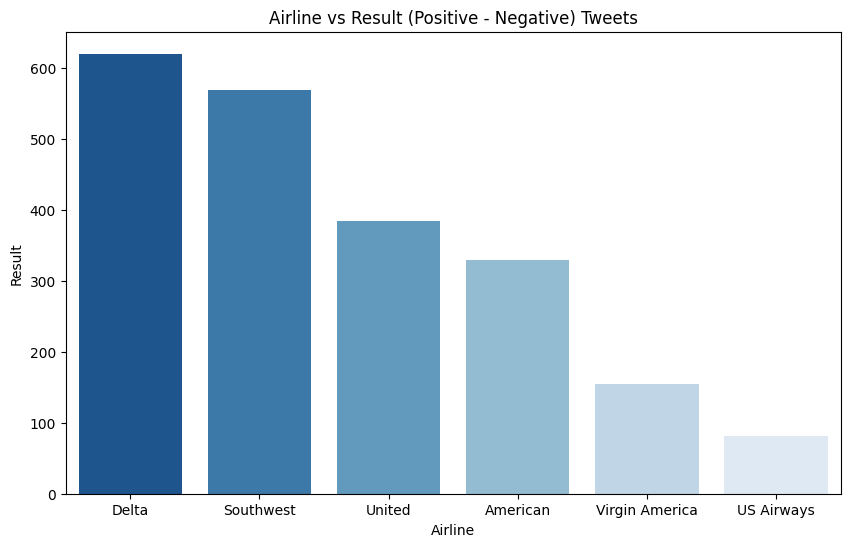

In [ ]:


# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts_sorted['Airline'], y=sentiment_counts_sorted['Result'], palette='Blues_r')

plt.xlabel('Airline')
plt.ylabel('Result')
plt.title('Airline vs Result (Positive - Negative) Tweets')
plt.show()


Delta seems to be the better since the users feels their service like better from others


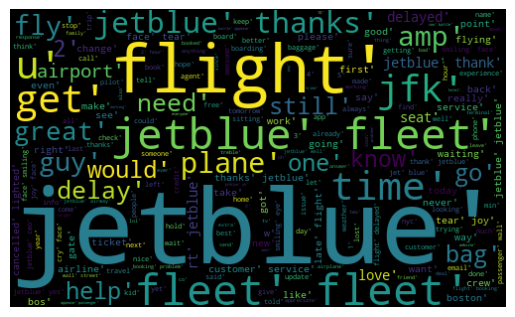

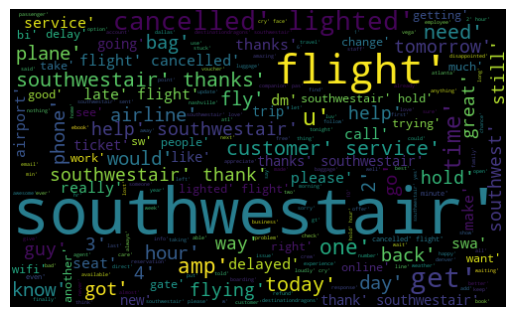

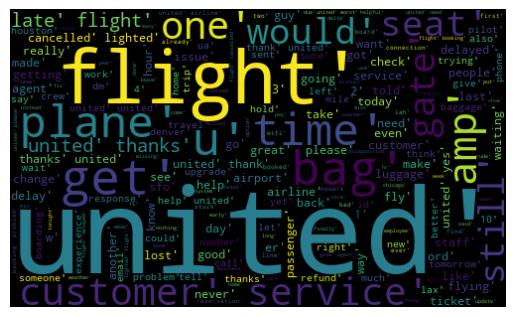

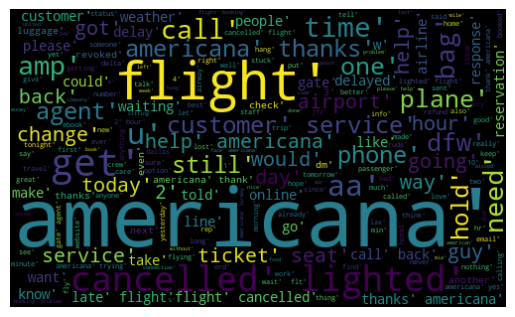

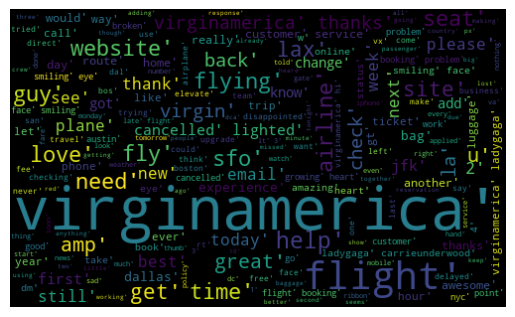

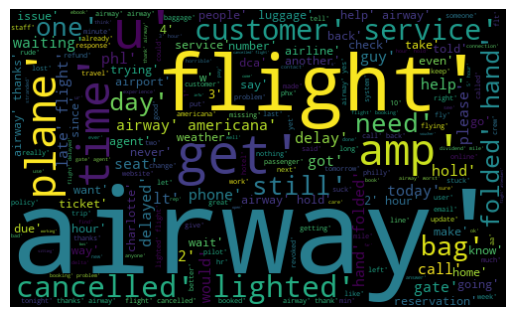

In [ ]:
# fancy word plot alll data
allwords = ' '.join([twts for twts in df_delta['clean_text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# fancy word plot alll data
allwords = ' '.join([twts for twts in df_southwest['clean_text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# fancy word plot alll data
allwords = ' '.join([twts for twts in df_unated['clean_text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# fancy word plot alll data
allwords = ' '.join([twts for twts in df_american['clean_text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# fancy word plot alll data
allwords = ' '.join([twts for twts in df_virgin['clean_text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# fancy word plot alll data
allwords = ' '.join([twts for twts in df_usair['clean_text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()






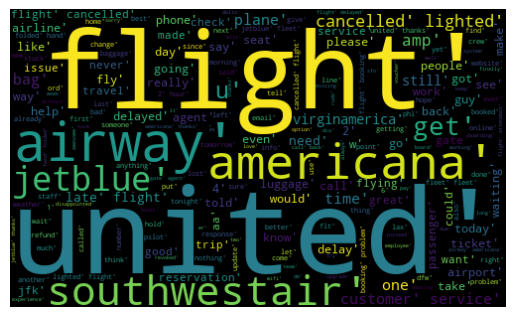

In [ ]:
# fancy word plot alll data
allwords = ' '.join([twts for twts in df_clean['clean_text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
texts_delta = df_delta['clean_text']
texts_southwest = df_southwest['clean_text']
texts_united = df_united['clean_text']
texts_usairways = df_usairways['clean_text']
texts_american = df_american['clean_text']
texts_virgin = df_virgin['clean_text']


In [ ]:
texts_delta

6746     ['jetblue', 'yesterday', 'way', 'er', 'all', '...
6747     ['jetblue', 'hope', 'fly', 'often', 'would', '...
6748       ['jetblue', 'flight', '1041', 'savannah', 'ga']
6749     ['jetblue', 'flight', 'came', 'late', 'flight'...
6750     ['jetblue', 'everyone', 'pilot', 'found', 'las...
                               ...                        
8963     ['jetblue', 'ceo', 'weighs', 'profit', 'flyer'...
8964     ['jetblue', 'really', 'getting', 'nerve', 'enr...
8965     ['jetblue', 'new', 'ceo', 'seek', 'right', 'ba...
12038    ['deltaassist', '57', 'minute', 'waiting', 'si...
12039    ['deltaassist', 'say', '140', 'character', 'pl...
Name: clean_text, Length: 2222, dtype: object

In [ ]:
# convert string representation of lists to actual lists
texts_delta_eval = texts_delta.apply(ast.literal_eval)
texts_southwest_eval = texts_southwest.apply(ast.literal_eval)
texts_united_eval = texts_united.apply(ast.literal_eval)
texts_usairways_eval = texts_usairways.apply(ast.literal_eval)
texts_american_eval = texts_american.apply(ast.literal_eval)
texts_virgin_eval = texts_virgin.apply(ast.literal_eval)



In [ ]:
texts_delta_eval

6746     [jetblue, yesterday, way, er, all, take, wheel...
6747     [jetblue, hope, fly, often, would, hate, chang...
6748                 [jetblue, flight, 1041, savannah, ga]
6749     [jetblue, flight, came, late, flight, jetblue,...
6750     [jetblue, everyone, pilot, found, last, flight...
                               ...                        
8963     [jetblue, ceo, weighs, profit, flyer, chronicl...
8964     [jetblue, really, getting, nerve, enraged, fac...
8965     [jetblue, new, ceo, seek, right, balance, plea...
12038    [deltaassist, 57, minute, waiting, silver, eli...
12039     [deltaassist, say, 140, character, plus, follow]
Name: clean_text, Length: 2222, dtype: object

In [ ]:
model_delta = Word2Vec(sentences=texts_delta_eval, vector_size=10, window=1, min_count=1, workers=4)
model_southwest = Word2Vec(sentences=texts_southwest_eval, vector_size=10, window=1, min_count=1, workers=4)
model_united = Word2Vec(sentences=texts_united_eval, vector_size=10, window=1, min_count=1, workers=4)
model_usairways = Word2Vec(sentences=texts_usairways_eval, vector_size=10, window=1, min_count=1, workers=4)
model_american = Word2Vec(sentences=texts_american_eval, vector_size=10, window=1, min_count=1, workers=4)
model_virgin = Word2Vec(sentences=texts_virgin_eval, vector_size=10, window=1, min_count=1, workers=4)


In [ ]:
# similar words to 'jetblue'
data_sim_jetblue = model_delta.wv.most_similar('jetblue', topn=10)
x_jetblue = [i for i, j in data_sim_jetblue]
y_jetblue = [j for i, j in data_sim_jetblue]
print("Words similar to 'delta':", x_jetblue)
print("Similarity score:", y_jetblue)

# similar words to 'southwestair'
data_sim_southwestair = model_southwest.wv.most_similar('southwestair', topn=10)
x_southwestair = [i for i, j in data_sim_southwestair]
y_southwestair = [j for i, j in data_sim_southwestair]
print("Words similar to 'southwestair':", x_southwestair)
print("Similarity score:", y_southwestair)

# similar words to 'united'
data_sim_united = model_united.wv.most_similar('united', topn=10)
x_united = [i for i, j in data_sim_united]
y_united = [j for i, j in data_sim_united]
print("Words similar to 'united':", x_united)
print("Similarity score:", y_united)

# similar words to 'airways'
data_sim_usairways = model_usairways.wv.most_similar('airway', topn=10)
x_airway = [i for i, j in data_sim_usairways]
y_airway = [j for i, j in data_sim_usairways]
print("Words similar to 'airway':", x_airway)
print("Similarity score:", y_airway)

# similar words to 'americana'
data_sim_americana = model_american.wv.most_similar('americana', topn=10)
x_americana = [i for i, j in data_sim_americana]
y_americana = [j for i, j in data_sim_americana]
print("Words similar to 'americana':", x_americana)
print("Similarity score:", y_americana)

# similar words to 'virginamerica'
data_sim_virginamerica = model_virgin.wv.most_similar('virginamerica', topn=10)
x_virginamerica = [i for i, j in data_sim_virginamerica]
y_virginamerica = [j for i, j in data_sim_virginamerica]
print("Words similar to 'virginamerica':", x_virginamerica)
print("Similarity score:", y_virginamerica)




Words similar to 'delta': ['flight', 'last', 'jfk', 'time', 'seat', 'need', 'right', 'hour', 'back', 'bag']
Similarity score: [0.9948168992996216, 0.991766095161438, 0.9906905293464661, 0.9900304675102234, 0.9893783926963806, 0.9870670437812805, 0.9868135452270508, 0.986172616481781, 0.9859949946403503, 0.985803484916687]
Words similar to 'southwestair': ['flight', 'home', 'southwest', 'point', 'tomorrow', 'fly', 'need', 'airport', 'delay', 'ticket']
Similarity score: [0.9959403872489929, 0.9952096939086914, 0.9935847520828247, 0.9931246638298035, 0.9922082424163818, 0.9919517636299133, 0.9914456605911255, 0.9911544919013977, 0.9908974766731262, 0.9906373023986816]
Words similar to 'united': ['take', 'dm', 'told', 'say', 'ord', 'plane', 'even', 'still', 'email', 'also']
Similarity score: [0.9979210495948792, 0.9975476861000061, 0.9973576068878174, 0.9971900582313538, 0.9965453743934631, 0.9964375495910645, 0.9961503148078918, 0.9960790276527405, 0.9959974884986877, 0.9958730340003967]


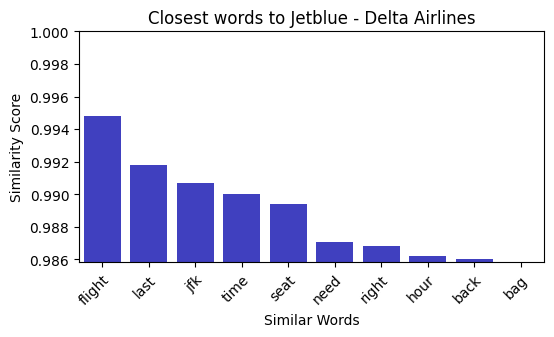

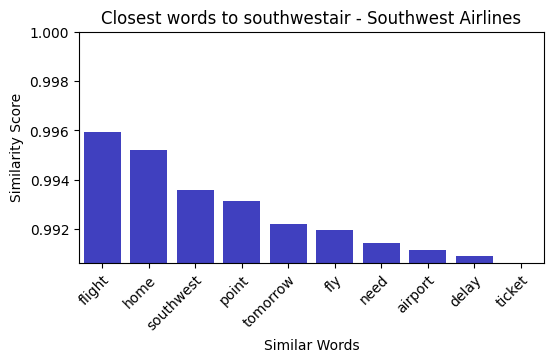

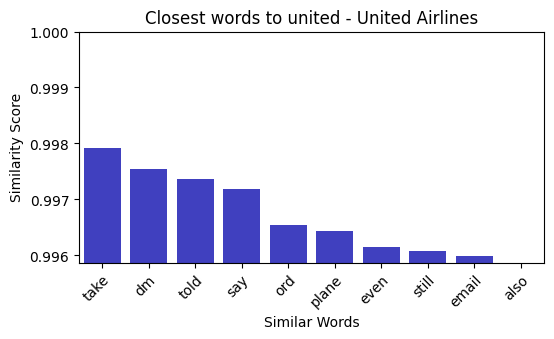

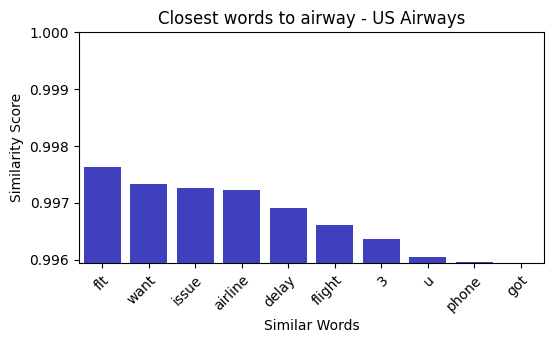

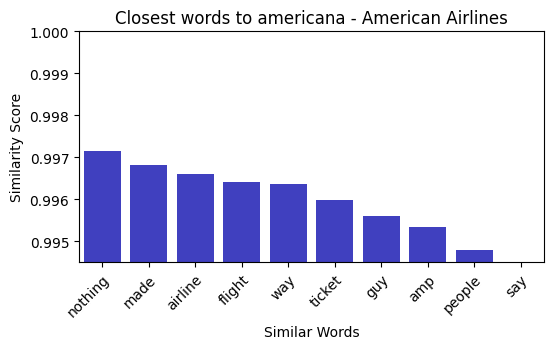

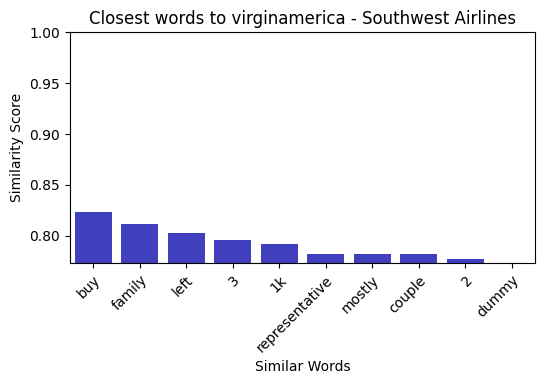

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=x_jetblue, y=y_jetblue, color="blue", saturation=.5, ax=ax)
ax.set_title('Closest words to Jetblue - Delta Airlines')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim(np.min(y_jetblue), 1)
ax.set_xlabel('Similar Words')
ax.set_ylabel('Similarity Score')

plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=x_southwestair, y=y_southwestair, color="blue", saturation=.5, ax=ax)
ax.set_title('Closest words to southwestair - Southwest Airlines')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim(np.min(y_southwestair), 1)
ax.set_xlabel('Similar Words')
ax.set_ylabel('Similarity Score')

plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=x_united, y=y_united, color="blue", saturation=.5, ax=ax)
ax.set_title('Closest words to united - United Airlines')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim(np.min(y_united), 1)
ax.set_xlabel('Similar Words')
ax.set_ylabel('Similarity Score')

plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=x_airway, y=y_airway, color="blue", saturation=.5, ax=ax)
ax.set_title('Closest words to airway - US Airways')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim(np.min(y_airway), 1)
ax.set_xlabel('Similar Words')
ax.set_ylabel('Similarity Score')

plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=x_americana, y=y_americana, color="blue", saturation=.5, ax=ax)
ax.set_title('Closest words to americana - American Airlines')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim(np.min(y_americana), 1)
ax.set_xlabel('Similar Words')
ax.set_ylabel('Similarity Score')

plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=x_virginamerica, y=y_virginamerica, color="blue", saturation=.5, ax=ax)
ax.set_title('Closest words to virginamerica - Southwest Airlines')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim(np.min(y_virginamerica), 1)
ax.set_xlabel('Similar Words')
ax.set_ylabel('Similarity Score')

plt.show()


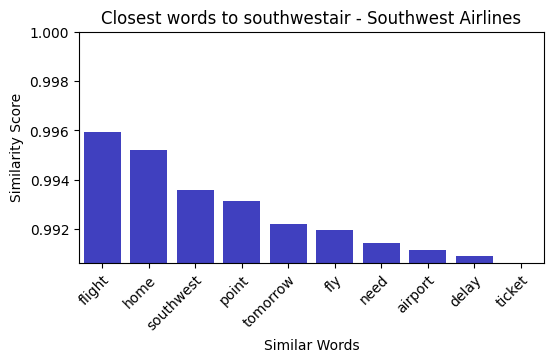

In [ ]:
df_clean.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,clean_text,polarity,subjectivity,opinion_label
6199,568136521502605312,negative,1.0000,Customer Service Issue,0.6906,Southwest,JessikaKM,0,"@SouthwestAir doesn't want to deal with me, bu...",2015-02-18 11:54:36 -0800,"['southwestair', 'want', 'deal', 'world', 'mig...",0.000000,0.000000,neutral
307,568803996774879232,positive,0.6884,NaN,NaN,Virgin America,GabriellaDago,0,@VirginAmerica I mean. Probably inappropriate ...,2015-02-20 08:06:55 -0800,"['virginamerica', 'mean', 'probably', 'inappro...",-0.312500,0.687500,negative
12669,570053168349851648,negative,1.0000,Customer Service Issue,1.0000,American,archetype_snypo,0,@AmericanAir is there another line I can call ...,2015-02-23 18:50:41 -0800,"['americana', 'another', 'line', 'call', 'hold...",0.000000,0.000000,neutral
5383,569154652735803392,negative,1.0000,Customer Service Issue,1.0000,Southwest,GoKebo,0,@SouthwestAir on hold for over an hour twice? ...,2015-02-21 07:20:18 -0800,"['southwestair', 'hold', 'hour', 'twice', 'ter...",-1.000000,1.000000,negative
6966,569983421549834240,positive,1.0000,NaN,NaN,Delta,lucianosr83,0,@JetBlue I would prefer a similar picture but ...,2015-02-23 14:13:32 -0800,"['jetblue', 'would', 'prefer', 'similar', 'pic...",0.383333,0.566667,positive


> #  - **`Data Analysis splited airlines dataframes`**.

In [ ]:
df_to_split_Xy = df_clean[['tweet_id','airline', 'clean_text', 'polarity', 'subjectivity','opinion_label']]
df_to_split_Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14601 entries, 0 to 14600
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       14601 non-null  int64  
 1   airline        14601 non-null  object 
 2   clean_text     14601 non-null  object 
 3   polarity       14601 non-null  float64
 4   subjectivity   14601 non-null  float64
 5   opinion_label  14601 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 684.5+ KB


In [ ]:
# move the label to a new df and remove from the df_combined
y_label = df_to_split_Xy['opinion_label']
X = df_to_split_Xy.drop(['opinion_label'], axis=1)
print(X.shape)
print(y_label.shape)

(14601, 5)
(14601,)


In [ ]:
# one-Hot Encode candidate, creating new columns for each unique value in the ‘airline’ column of the DataFrame
X = pd.get_dummies(X, columns=['airline'])

In [ ]:
print("\t\t⚠️ Text after hot encoding and titles modificaton ⚠️")
display(X.sample(2))

		⚠️ Text after hot encoding and titles modificaton ⚠️


,tweet_id,clean_text,polarity,subjectivity,american,delta,southwest,usairways,united,virgin_america
13885,569690664029462529,"['americana', 'even', 'give', 'option', 'hold'...",-0.10,0.45,1,0,0,0,0,0
8710,567916937679884288,"['jetblue', 'disappointed', 'flight', 'back', ...",-0.25,0.25,0,1,0,0,0,0


In [ ]:
X = X.rename(columns={'airline_American': 'american', 'airline_Delta': 'delta', 'airline_Southwest': 'southwest', 'airline_US Airways': 'usairways', 'airline_United': 'united', 'airline_Virgin America': 'virgin_america'})
X.sample(5)

,tweet_id,clean_text,polarity,subjectivity,american,delta,southwest,usairways,united,virgin_america
13542,569821519116955650,"['americana', 'hello', 'can', 'not', 'register...",0.000000,0.400000,1,0,0,0,0,0
5713,568784295759777797,"['southwestair', 'go', 'airline', 'much', 'say...",0.242857,0.367857,0,0,1,0,0,0
11672,567832250110337024,"['airway', '3', 'hour', 'hold', 'oh', 'wait', ...",-0.166667,0.088889,0,0,0,1,0,0
9058,570262676481421312,"['airway', '2day', 'coffee', 'amp', '1', 'work...",-0.052778,0.075000,0,0,0,1,0,0
12425,570178443167571968,"['lol', 'great', 'answer', 'americana', 'jayfr...",0.533333,0.816667,1,0,0,0,0,0


In [ ]:
print("\t\t⚠️ Labels before encoding ⚠️")

print(y_label)

# encode the labels
label_encoder = LabelEncoder()
y_labels_encoded = label_encoder.fit_transform(y_label)

print("\t\t⚠️ Labels after encoding ⚠️")
print(y_labels_encoded)



		⚠️ Labels before encoding ⚠️
0         neutral
1         neutral
2        negative
3        positive
4        negative
           ...   
14596     neutral
14597    negative
14598     neutral
14599     neutral
14600    positive
Name: opinion_label, Length: 14601, dtype: object
		⚠️ Labels after encoding ⚠️
[1 1 0 ... 1 1 2]


In [ ]:
# reshaping y_labels_encoded into a 2D array with one column and as many rows as needed to accommodate the data. without changing the data itself.
labels_reshape = y_labels_encoded.reshape(-1, 1)

In [ ]:
#same numbero of rows in a 2D array
labels_reshape.shape

(14601, 1)

In [ ]:
print("\t\t⚠️ Labels after encoding and reshaping, (ready to go) ⚠️")
labels_reshape[0:10]

		⚠️ Labels after encoding and reshaping, (ready to go) ⚠️


array([[1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2]])

In [ ]:
#printing the class labels that the label_encoder was fitted on and the integer values that the encoder uses to represent these labels
# get the labels
labels = label_encoder.classes_

# print the labels and their corresponding integer values
for i, label in enumerate(labels):
    print(f'{label} : {i}')

negative : 0
neutral : 1
positive : 2


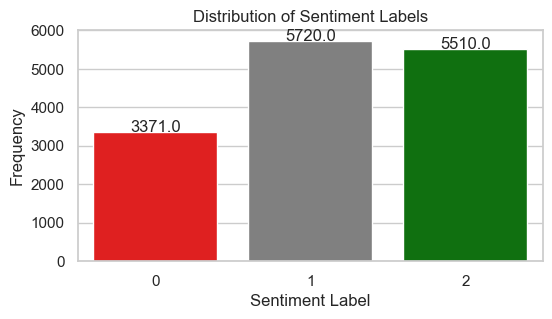

In [ ]:
# Plot labels
labels_flat = labels_reshape.flatten()

plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")

# Define custom colors for each label
colors = ['red', 'grey', 'green']

# Create countplot with custom colors
ax = sns.countplot(x=labels_flat, palette=colors)

ax.set_title('Distribution of Sentiment Labels')
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Frequency')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()




In [ ]:
X.sample(5)

,tweet_id,clean_text,polarity,subjectivity,american,delta,southwest,usairways,united,virgin_america
9480,569912963273879552,"['airway', 'called', '3x', 'amp', 'say', 'high...",0.053333,0.18,0,0,0,1,0,0
11777,567763837055954944,"['airway', 'thank', 'much', 'stressful', 'day']",0.200000,0.20,0,0,0,1,0,0
391,568303606710956032,"['virginamerica', 'omg', 'omg', 'smiling', 'fa...",0.000000,0.00,0,0,0,0,0,1
11445,568111178708336640,"['airway', 'yeah', 'know', 'spend', 'almost', ...",0.000000,0.00,0,0,0,1,0,0
11956,570284054605639683,"['americana', 'good', 'care', 'customer', 'any...",0.350000,0.30,1,0,0,0,0,0


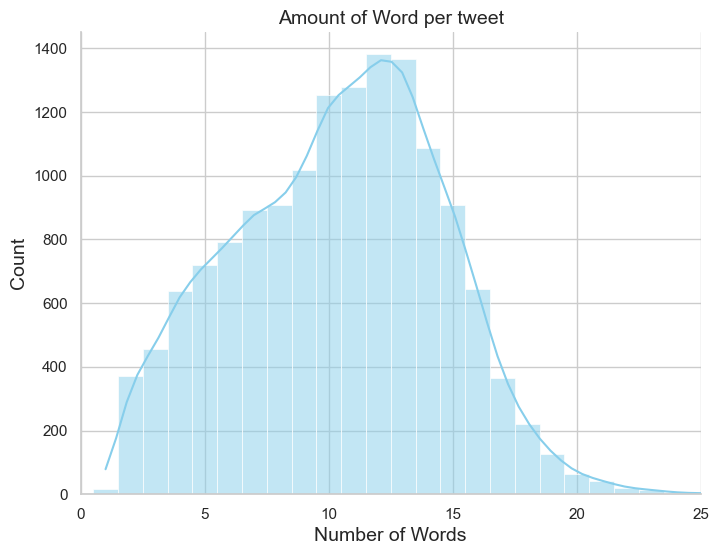

In [ ]:
# Calculate the length of cleaned_text in terms of words
X['word_count'] = X['clean_text'].apply(lambda x: len(x.split()))

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the distribution of word counts with a different color and add kde for smoothness
sns.histplot(X['word_count'], color='skyblue', kde=True, discrete=True, ax=ax)

# Set the title and labels with increased font sizes
ax.set_title('Amount of Word per tweet', fontsize=14)
ax.set_xlabel('Number of Words', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Set the x limit
ax.set_xlim(0, 25)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


**Hghlights:**

* Maximum 20
* Minimum 2
* Mean 12
* Vocabulary size 11607



In [ ]:
# filter tweets with 1 word
tweets_with_one_word = X[X['word_count'] == 1]

# display 5 tweets with 1 word
for index, tweet in tweets_with_one_word.tail().iterrows():
    print(f"tweet index: {index}")
    print(f"text: {tweet['clean_text']}")
    print("------------------")


tweet index: 11286
text: ['airway']
------------------
tweet index: 11608
text: ['airway']
------------------
tweet index: 11905
text: ['americana']
------------------
tweet index: 12498
text: ['americana']
------------------
tweet index: 13309
text: ['americana']
------------------


In [ ]:
# calculate the vocab size
corpus = X['clean_text'].values
tokenizer = Tokenizer()

#fit tokenizer on tweets
tokenizer.fit_on_texts(corpus)

# create a mapping of words with unique words
word_index = tokenizer.word_index

In [ ]:
# len of vocab size
vocab_size = len(word_index)
vocab_size

11607

In [ ]:
labels_reshape[0:10]

array([[1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2]])

In [ ]:
labels_reshape.shape

(14601, 1)

> #  - **`Split data in Test, Val and Train`**.

**We have to normalize the X data (features or preprocessed text)**

In [ ]:
# split the data 70% test, 15% validation and 15% test

X_train, X_temp, y_train, y_temp = train_test_split(X['clean_text'], labels_reshape, test_size=0.3, random_state=42)

#  split the temp into validation and test (50% for each one)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:

print("\t\t⚠️ Train X and y data: ⚠️")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()

print("\t\t⚠️ Validation X and y data: ⚠️")
print("X_val shape:", X_val.shape)
print("y_val shape:",y_val.shape)
print()
print("\t\t⚠️ Testing X and y data: ⚠️")
print("X_test shape:", X_test.shape)
print("y_test shape:",y_test.shape)



		⚠️ Train X and y data: ⚠️
X_train shape: (10220,)
y_train shape: (10220, 1)

		⚠️ Validation X and y data: ⚠️
X_val shape: (2190,)
y_val shape: (2190, 1)

		⚠️ Testing X and y data: ⚠️
X_test shape: (2191,)
y_test shape: (2191, 1)


In [ ]:
# define the vocabulary size, max length and embedding dimensions, more than that will be truncated
num_words = 11607

# define an upper limit on the length of the sequences in the corpus (tweets), less will be padded, more will be truncated
sequence_length = 20

In [ ]:
# instantiate the tokenizer with the vocabulary size and fit on the train data, most common 11607 words
tokenizer = Tokenizer(num_words=num_words)

# creates the vocabulary index based on word frequency in text data. So lower integer means more frequent word
tokenizer.fit_on_texts(X_train)

In [ ]:
# convert the text to sequences of integers based on the tokenizer vocabulary index
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# check the conversion, 10 first lines of the train data
for i in range(10):
    print(f"sequence {i + 1}: {X_train_seq[i]}")
    print()

sequence 1: [2, 22, 324, 11, 1306, 681, 64]

sequence 2: [4, 255, 94, 31, 98, 61, 62, 142, 1135, 8, 24, 777, 4717]

sequence 3: [4, 391, 50, 15, 8, 249, 438, 1, 92, 109, 1, 303]

sequence 4: [3, 216, 68, 27, 45, 1, 148, 41, 105, 92]

sequence 5: [6, 52, 58, 356, 304, 1842, 2746, 429, 2030, 38, 30, 16, 12, 2747, 2748]

sequence 6: [2, 1, 2310, 133, 10, 19, 52, 7, 68, 113, 27, 143, 916]

sequence 7: [6, 1, 4718, 268, 189, 1136, 117, 85, 303, 258, 1007, 1, 598, 228, 384, 228]

sequence 8: [4, 191, 163, 405, 139, 1528, 872, 127, 106, 38, 78, 64]

sequence 9: [3, 1, 10, 19, 41, 657, 42]

sequence 10: [5, 239, 1221, 2311, 15, 4719, 2312, 1137, 56, 1419, 191, 2313, 2031, 2314]



In [ ]:
# pad the sequences to have the same length (20) with 0s at the beginning of the sequence for tweets with less than 20 words and truncate the ones with more than 20 words
X_train_pad = pad_sequences(X_train_seq, maxlen=sequence_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=sequence_length)

In [ ]:
# check the conversion, 5 first lines
for i in range(5):
    print(f"sequence {i + 1}: {X_train_pad[i]}")
    print()

sequence 1: [   0    0    0    0    0    0    0    0    0    0    0    0    0    2
   22  324   11 1306  681   64]

sequence 2: [   0    0    0    0    0    0    0    4  255   94   31   98   61   62
  142 1135    8   24  777 4717]

sequence 3: [  0   0   0   0   0   0   0   0   4 391  50  15   8 249 438   1  92 109
   1 303]

sequence 4: [  0   0   0   0   0   0   0   0   0   0   3 216  68  27  45   1 148  41
 105  92]

sequence 5: [   0    0    0    0    0    6   52   58  356  304 1842 2746  429 2030
   38   30   16   12 2747 2748]



In [ ]:
print("\t\t⚠️ X_train before processing: ⚠️")
print(X_train[0:1])
print("\t\t⚠️ X_train after tokenization and change to sequences: ⚠️")
print(X_train_seq[0:1])
print("\t\t⚠️ X_train after padding: ⚠️")
print(X_train_pad[0:1])

		⚠️ X_train before processing: ⚠️
2829    ['united', 'need', 'add', 'service', 'dog', 'i...
Name: clean_text, dtype: object
		⚠️ X_train after tokenization and change to sequences: ⚠️
[[2, 22, 324, 11, 1306, 681, 64]]
		⚠️ X_train after padding: ⚠️
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    2
    22  324   11 1306  681   64]]


> #  - **`Mdelling`**.

>- **Model 1:  `Simple RNN`**.
>- **Model 2:  `LSTM`**.
>- **Model 3:  `LSTM hyperparameter tunned`**.
>- **Model 4:  `LSTM layers tunned`**.
>- **Model 5:  `GRU`**.


In [ ]:
# our output has 3 classes (positive, negative and neutral)
OUTPUT_UNITS = 3
# for multiclass classification we use softmax activation function in the output layer and categorical_crossentropy as loss function
OUTPUT_ACT = 'softmax'

### Functions

In [ ]:
def compile_model(model):
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
def train_model(model,
                X_train,
                y_train,
                X_val,
                y_val,
                epochs=5,
                batch_size=128):
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val))
    return history


In [ ]:
#def display_results(history, model_name):
def display_results(history, model_name):
    print(f"{model_name} Training Accuracy: {history.history['accuracy'][-1]:.4%}")
    print(f"{model_name} Validation Accuracy: {history.history['val_accuracy'][-1]:.4%}")


In [ ]:
def plot_confusion_matrix(model, X_val_pad, y_val):
    y_pred_prob = model.predict(X_val_pad)
    y_pred = np.argmax(y_pred_prob, axis=1)

    cm = confusion_matrix(y_val, y_pred)

    plt.title(f"Confusion Matrix {model.name}")
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
              xticklabels=['Negative(Pred)', 'Neutral(Pred)', 'Positive(Pred)'],
             yticklabels=['Negative(atual) ', 'Neutral(atual)', 'Positive(atual)'])
    plt.show()

    return cm

In [ ]:
def plot_confusion_matrix(model, X_val_pad, y_val):
    y_pred_prob = model.predict(X_val_pad)
    y_pred = np.argmax(y_pred_prob, axis=1)

    cm = confusion_matrix(y_val, y_pred)

    # Create a figure and axis with larger size for better visibility
    fig, ax = plt.subplots(figsize=(8, 4))

    # Use a different colormap for a more visually distinct heatmap
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)

    # Create the heatmap with annotations and no color bar
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, cbar=False,
                xticklabels=['Negative(Pred)', 'Neutral(Pred)', 'Positive(Pred)'],
                yticklabels=['Negative(Actual)', 'Neutral(Actual)', 'Positive(Actual)'],
                ax=ax)  # Plot on the created Axes object

    # Set the title with increased font size
    ax.set_title(f'Confusion Matrix: {model.name}', fontsize=16)

    # Increase the font size of the labels for better visibility
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show the plot
    plt.show()

    return cm


> #  - ** `Simple RNN`**.

In [ ]:
# Create the model
model_RNN = Sequential()

# Embedding layer with the output dimension matching the units in SimpleRNN
model_RNN.add(Embedding(input_dim=num_words, output_dim=128, input_length=sequence_length))

# Spatial Dropout layer to help prevent overfitting by dropping entire 1D feature maps
model_RNN.add(SpatialDropout1D(0.4))

# Simple RNN layer with 128 units
model_RNN.add(SimpleRNN(128))

# Dropout layer to help prevent overfitting by randomly setting a fraction of input units to 0
model_RNN.add(Dropout(0.4))

# Dense layer with units=OUTPUT_UNITS and activation function specified by OUTPUT_ACT
model_RNN.add(Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACT))

# Display a summary of the model architecture, including the number of parameters in each layer
model_RNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 128)           1485696   
                                                                 
 spatial_dropout1d (SpatialD  (None, 20, 128)          0         
 ropout1D)                                                       
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,518,979
Trainable params: 1,518,979
Non-trainable params: 0
______________________________________________

In [ ]:
# compile model RNN
compile_model(model_RNN)

In [ ]:
# Train the RNN model
history_RNN = train_model(model_RNN, X_train_pad, y_train, X_val_pad, y_val)

Epoch 1/5
80/80 [==============================] - 24s 205ms/step - loss: 1.0288 - accuracy: 0.4662 - val_loss: 0.8789 - val_accuracy: 0.6388
Epoch 2/5
80/80 [==============================] - 13s 165ms/step - loss: 0.6271 - accuracy: 0.7522 - val_loss: 0.5149 - val_accuracy: 0.8082
Epoch 3/5
80/80 [==============================] - 14s 173ms/step - loss: 0.2607 - accuracy: 0.9143 - val_loss: 0.4445 - val_accuracy: 0.8397
Epoch 4/5
80/80 [==============================] - 16s 199ms/step - loss: 0.1115 - accuracy: 0.9695 - val_loss: 0.4096 - val_accuracy: 0.8635
Epoch 5/5
80/80 [==============================] - 12s 151ms/step - loss: 0.0569 - accuracy: 0.9850 - val_loss: 0.4459 - val_accuracy: 0.8598


In [ ]:
display_results(history_RNN, 'RNN')

RNN Training Accuracy: 98.5029%
RNN Validation Accuracy: 85.9817%


In [ ]:
# Save the RRN model to a file
model_RNN.save('model_RNN.keras')
model_RNN.save('D:/RRC_DSML/Third term/COMP 3704 Neural Networks/final project/model_RNN.keras')

18/69 [======>.......................] - ETA: 0s

69/69 [==============================] - 0s 6ms/step


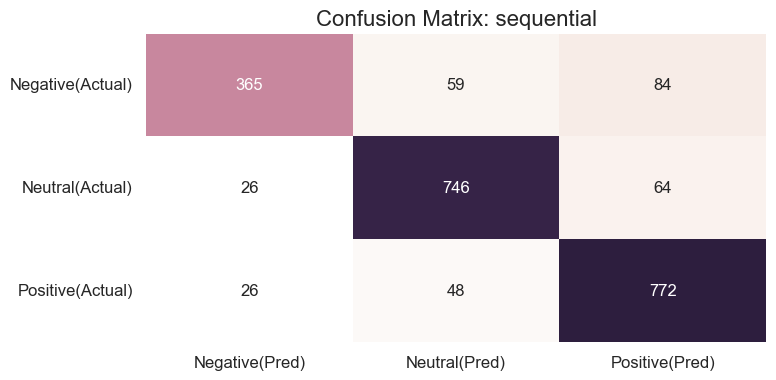

array([[365,  59,  84],
       [ 26, 746,  64],
       [ 26,  48, 772]], dtype=int64)

In [ ]:
plot_confusion_matrix1(model_RNN, X_val_pad, y_val)


> #  - **`Simple LSTM`**.

In [ ]:
# Create the model
model_LSTM = Sequential()

# Embedding layer with the output dimension matching the units in LSTM
model_LSTM.add(Embedding(input_dim=num_words, output_dim=128, input_length=sequence_length))

# Spatial Dropout layer to help prevent overfitting by dropping entire 1D feature maps
model_LSTM.add(SpatialDropout1D(0.4))

# LSTM layer with 128 units
model_LSTM.add(LSTM(128))

# Dropout layer to help prevent overfitting by randomly setting a fraction of input units to 0
model_LSTM.add(Dropout(0.4))

# Dense layer with units=OUTPUT_UNITS and activation function specified by OUTPUT_ACT
model_LSTM.add(Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACT))

# Display a summary of the model architecture, including the number of parameters in each layer
model_LSTM.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 128)           1485696   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 20, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,617,667
Trainable params: 1,617,667
Non-trainable params: 0
____________________________________________

In [ ]:
# compile the model
compile_model(model_LSTM)

In [ ]:
# Train
history_LSTM = train_model(model_LSTM, X_train_pad, y_train, X_val_pad, y_val)

Epoch 1/5


80/80 [==============================] - 16s 138ms/step - loss: 0.9584 - accuracy: 0.5336 - val_loss: 0.6884 - val_accuracy: 0.7187
Epoch 2/5
80/80 [==============================] - 9s 110ms/step - loss: 0.4305 - accuracy: 0.8454 - val_loss: 0.3674 - val_accuracy: 0.8648
Epoch 3/5
80/80 [==============================] - 9s 111ms/step - loss: 0.1674 - accuracy: 0.9509 - val_loss: 0.3198 - val_accuracy: 0.8904
Epoch 4/5
80/80 [==============================] - 10s 124ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.2978 - val_accuracy: 0.9023
Epoch 5/5
80/80 [==============================] - 10s 128ms/step - loss: 0.0575 - accuracy: 0.9841 - val_loss: 0.3302 - val_accuracy: 0.9018


In [ ]:
display_results(history_LSTM, 'LSTM')

LSTM Training Accuracy: 98.4051%
LSTM Validation Accuracy: 90.1827%


In [ ]:
model_LSTM.save('model_LSTM.keras')
model_LSTM.save('D:/RRC_DSML/Third term/COMP 3704 Neural Networks/final project/model_LSTM.keras')

69/69 [==============================] - 2s 18ms/step


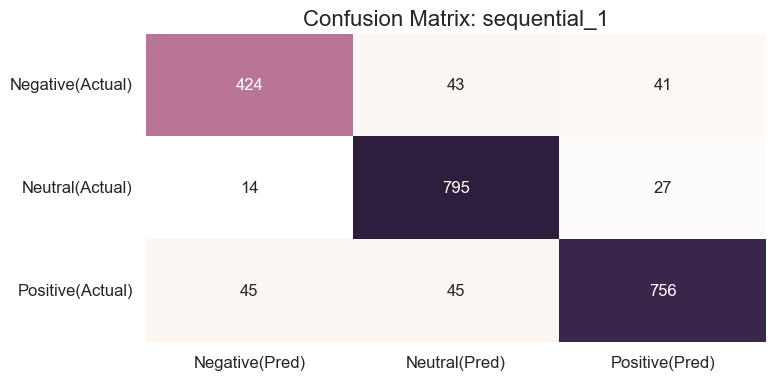

array([[424,  43,  41],
       [ 14, 795,  27],
       [ 45,  45, 756]], dtype=int64)

In [ ]:
plot_confusion_matrix(model_LSTM, X_val_pad, y_val)

> #  - ** `Tunned LSTM`**.

In [ ]:
# LSTM Model 2
model_LSTM_2 = Sequential()

# Embedding layer with the output dimension matching the units in LSTM
model_LSTM_2.add(Embedding(input_dim=num_words, output_dim=128, input_length=sequence_length))

# Spatial Dropout layer to help prevent overfitting by dropping entire 1D feature maps
model_LSTM_2.add(SpatialDropout1D(0.4))

# LSTM layer with 64 units
model_LSTM_2.add(LSTM(64))

# Dropout layer to help prevent overfitting by randomly setting a fraction of input units to 0
model_LSTM_2.add(Dropout(0.4))

# Dense layer with units=OUTPUT_UNITS and activation function specified by OUTPUT_ACT
model_LSTM_2.add(Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACT))

# Display a summary of the model architecture, including the number of parameters in each layer
model_LSTM_2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 128)           1485696   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 20, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,535,299
Trainable params: 1,535,299
Non-trainable params: 0
____________________________________________

In [ ]:
compile_model(model_LSTM_2)

In [ ]:
# Train
history_LSTM_2 = train_model(model_LSTM_2, X_train_pad, y_train, X_val_pad, y_val)

Epoch 1/5


80/80 [==============================] - 11s 81ms/step - loss: 0.9945 - accuracy: 0.5098 - val_loss: 0.7843 - val_accuracy: 0.6767
Epoch 2/5
80/80 [==============================] - 5s 68ms/step - loss: 0.4867 - accuracy: 0.8268 - val_loss: 0.3461 - val_accuracy: 0.8744
Epoch 3/5
80/80 [==============================] - 6s 72ms/step - loss: 0.1806 - accuracy: 0.9459 - val_loss: 0.2858 - val_accuracy: 0.8986
Epoch 4/5
80/80 [==============================] - 6s 69ms/step - loss: 0.0940 - accuracy: 0.9732 - val_loss: 0.2891 - val_accuracy: 0.9091
Epoch 5/5
80/80 [==============================] - 6s 70ms/step - loss: 0.0594 - accuracy: 0.9836 - val_loss: 0.3341 - val_accuracy: 0.8991


In [ ]:
display_results(history_LSTM_2, 'LSTM_2')

LSTM_2 Training Accuracy: 98.3562%
LSTM_2 Validation Accuracy: 89.9087%


In [ ]:
# Save the RRN model to a file
model_LSTM_2.save('model_LSTM_2.keras')
model_LSTM_2.save('D:/RRC_DSML/Third term/COMP 3704 Neural Networks/final project/model_LSTM_2.keras')

69/69 [==============================] - 2s 10ms/step


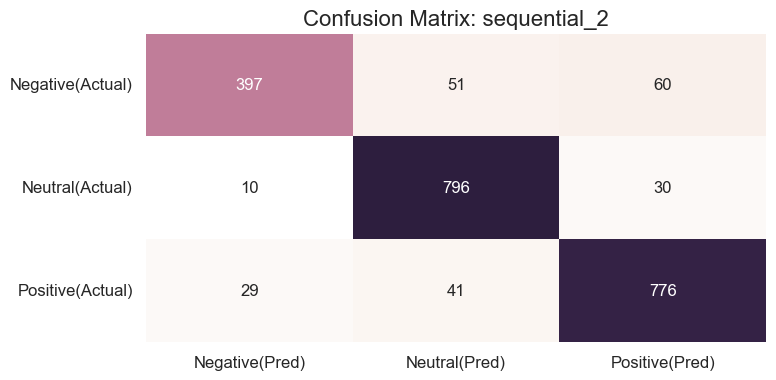

array([[397,  51,  60],
       [ 10, 796,  30],
       [ 29,  41, 776]], dtype=int64)

In [ ]:
plot_confusion_matrix(model_LSTM_2, X_val_pad, y_val)

> #  - **`Tunned LSTM more layers`**.

In [ ]:
# LSTM model 3
model_LSTM_3 = Sequential()

# Embedding layer
model_LSTM_3.add(Embedding(input_dim=num_words, output_dim=128, input_length=sequence_length))

# Spatial Dropout layer
model_LSTM_3.add(SpatialDropout1D(0.4))

# First LSTM layer
model_LSTM_3.add(LSTM(64, return_sequences=True))

# Second LSTM layer
model_LSTM_3.add(LSTM(32))

# Dropout layer
model_LSTM_3.add(Dropout(0.4))

# First Dense layer
model_LSTM_3.add(Dense(32, activation='relu'))

# Second Dense layer
model_LSTM_3.add(Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACT))

# Print the summary of the model
model_LSTM_3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 128)           1485696   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 20, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 20, 64)            49408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                      

In [ ]:
compile_model(model_LSTM_3)

In [ ]:
# Train
history_LSTM_3 = train_model(model_LSTM_3, X_train_pad, y_train, X_val_pad, y_val)

Epoch 1/5
80/80 [==============================] - 20s 142ms/step - loss: 1.0115 - accuracy: 0.4793 - val_loss: 0.8146 - val_accuracy: 0.6498
Epoch 2/5
80/80 [==============================] - 9s 110ms/step - loss: 0.4881 - accuracy: 0.8231 - val_loss: 0.3344 - val_accuracy: 0.8808
Epoch 3/5
80/80 [==============================] - 9s 109ms/step - loss: 0.1829 - accuracy: 0.9452 - val_loss: 0.2755 - val_accuracy: 0.9087
Epoch 4/5
80/80 [==============================] - 9s 115ms/step - loss: 0.0999 - accuracy: 0.9709 - val_loss: 0.2909 - val_accuracy: 0.9146
Epoch 5/5
80/80 [==============================] - 9s 119ms/step - loss: 0.0634 - accuracy: 0.9825 - val_loss: 0.3041 - val_accuracy: 0.9110


In [ ]:
display_results(history_LSTM_3, 'LSTM_3')

LSTM_3 Training Accuracy: 98.2485%
LSTM_3 Validation Accuracy: 91.0959%


In [ ]:
# Save the RRN model to a file
model_LSTM_3.save('model_LSTM_3.keras')
model_LSTM_3.save('D:/RRC_DSML/Third term/COMP 3704 Neural Networks/final project/model_LSTM_3.keras')

69/69 [==============================] - 2s 14ms/step


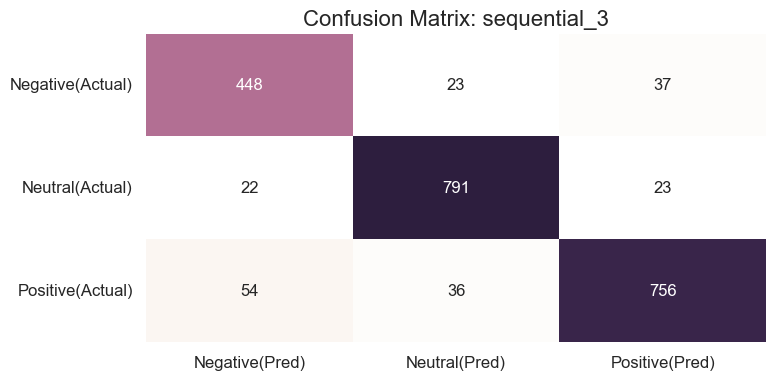

array([[448,  23,  37],
       [ 22, 791,  23],
       [ 54,  36, 756]], dtype=int64)

In [ ]:
plot_confusion_matrix(model_LSTM_3, X_val_pad, y_val)

> #  - ** `GRU`**.

In [ ]:
# Create the model
model_GRU = Sequential()

model_GRU.add(Embedding(input_dim=num_words, output_dim=128, input_length=sequence_length))

model_GRU.add(SpatialDropout1D(0.5))

model_GRU.add(GRU(128, reset_after=False))

model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACT))

model_GRU.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 128)           1485696   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 20, 128)          0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 128)               98688     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,584,771
Trainable params: 1,584,771
Non-trainable params: 0
____________________________________________

In [ ]:
# compile the model
compile_model(model_GRU)

In [ ]:
# Train
history_GRU = train_model(model_GRU, X_train_pad, y_train, X_val_pad, y_val)

Epoch 1/5


80/80 [==============================] - 13s 107ms/step - loss: 0.9557 - accuracy: 0.5242 - val_loss: 0.6587 - val_accuracy: 0.7466
Epoch 2/5
80/80 [==============================] - 8s 102ms/step - loss: 0.4193 - accuracy: 0.8533 - val_loss: 0.3419 - val_accuracy: 0.8772
Epoch 3/5
80/80 [==============================] - 8s 102ms/step - loss: 0.1817 - accuracy: 0.9457 - val_loss: 0.2620 - val_accuracy: 0.9137
Epoch 4/5
80/80 [==============================] - 9s 109ms/step - loss: 0.1010 - accuracy: 0.9722 - val_loss: 0.2648 - val_accuracy: 0.9210
Epoch 5/5
80/80 [==============================] - 9s 109ms/step - loss: 0.0704 - accuracy: 0.9810 - val_loss: 0.2996 - val_accuracy: 0.9110


In [ ]:
display_results(history_GRU, 'GRU')

GRU Training Accuracy: 98.1018%
GRU Validation Accuracy: 91.0959%


In [ ]:
# Save the RRN model to a file
model_GRU.save('model_GRU.keras')
model_GRU.save('D:/RRC_DSML/Third term/COMP 3704 Neural Networks/final project/model_GRU.keras')

69/69 [==============================] - 1s 12ms/step


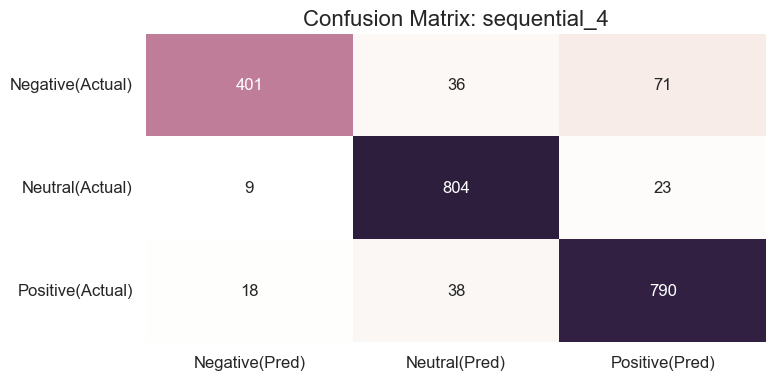

array([[401,  36,  71],
       [  9, 804,  23],
       [ 18,  38, 790]], dtype=int64)

In [ ]:
plot_confusion_matrix(model_GRU, X_val_pad, y_val)

In [ ]:
display_results(history_RNN, 'RNN')
print()
display_results(history_LSTM, 'LSTM')
print()
display_results(history_LSTM_2, 'LSTM_2')
print()
display_results(history_LSTM_3, 'LSTM_3')
print()
display_results(history_GRU, 'GRU')

RNN Training Accuracy: 98.5029%
RNN Validation Accuracy: 85.9817%

LSTM Training Accuracy: 98.4051%
LSTM Validation Accuracy: 90.1827%

LSTM_2 Training Accuracy: 98.3562%
LSTM_2 Validation Accuracy: 89.9087%

LSTM_3 Training Accuracy: 98.2485%
LSTM_3 Validation Accuracy: 91.0959%

GRU Training Accuracy: 98.1018%
GRU Validation Accuracy: 91.0959%


In [ ]:
import pandas as pd

# Create a dictionary with the model names and their histories
histories = {'RNN': history_RNN, 'LSTM': history_LSTM, 'LSTM_2': history_LSTM_2, 'LSTM_3': history_LSTM_3, 'GRU': history_GRU}

# Initialize lists to store the model names and their accuracies
models = []
training_accuracies = []
validation_accuracies = []

# Loop through the dictionary and append the model name and accuracies to the lists
for model_name, history in histories.items():
    models.append(model_name)
    training_accuracies.append(history.history['accuracy'][-1])
    validation_accuracies.append(history.history['val_accuracy'][-1])

# Create a DataFrame from the lists
results_df = pd.DataFrame({'Model': models, 'Training Accuracy': training_accuracies, 'Validation Accuracy': validation_accuracies})

# Print the DataFrame
results_df.sort_values(by='Validation Accuracy', ascending=False)


,Model,Training Accuracy,Validation Accuracy
3,LSTM_3,0.982485,0.910959
4,GRU,0.981018,0.910959
1,LSTM,0.984051,0.901827
2,LSTM_2,0.983562,0.899087
0,RNN,0.985029,0.859817


> #  - ** `Comments:`**.

All models demonstrated consistently high training accuracy, indicating their ability to learn effectively. However, they also exhibited signs of overfitting, suggesting that they may not generalize well to unseen data.

Despite the overall high performance of all models, there were notable differences in their validation accuracies. The LSTM_3 model, which had a more complex architecture with additional layers, achieved the highest validation accuracy. This suggests that the added complexity allowed the model to capture more intricate patterns in the data, leading to better generalization.

Interestingly, while the LSTM model had slightly lower training accuracy than LSTM_3, it had higher validation accuracy. This further underscores the importance of validation accuracy as a measure of a model’s ability to generalize.

Both the LSTM and GRU models were able to capture more complex parameters in the data compared to the simpler RNN model. This is likely due to their ability to capture long-term dependencies in the data.

Among all the models, the GRU model stands out for its computational efficiency. Despite being less computationally expensive, it was more effective at capturing long-term dependencies compared to the other models. This makes the GRU model an attractive choice considering the trade-off between computational efficiency and model complexity.

Moving forward, we could consider adjusting learning rates, experimenting with different batch sizes, and tuning the architecture to further improve the overall accuracy on the training dataset.


> #  - **`Best model with testing Data`**.

In [ ]:
model_best = model_GRU

In [ ]:
# calculate the test accuracy for model_GRU best model
test_acc = model_best.evaluate(X_test_pad, y_test)[1]
# print the test accuracy
print(f'Testing Accuracy: {test_acc:.4%}')

 8/69 [==>...........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.9336

69/69 [==============================] - 1s 18ms/step - loss: 0.3061 - accuracy: 0.9201
Testing Accuracy: 92.0128%


 5/69 [=>............................] - ETA: 0s

69/69 [==============================] - 1s 17ms/step


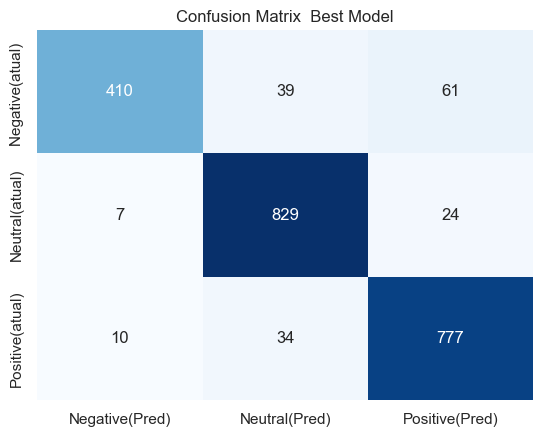

In [ ]:
labels = label_encoder.classes_

# make predictions
y_test_pred = model_best.predict(X_test_pad)

# get the labels
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_labels)

plt.title(f"Confusion Matrix  Best Model")
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
          xticklabels=['Negative(Pred)', 'Neutral(Pred)', 'Positive(Pred)'],
            yticklabels=['Negative(atual) ', 'Neutral(atual)', 'Positive(atual)'])
plt.show()



In [ ]:
# other metrics
print(classification_report(y_test, y_test_pred_labels, target_names=labels))

              precision    recall  f1-score   support

    negative       0.96      0.80      0.88       510
     neutral       0.92      0.96      0.94       860
    positive       0.90      0.95      0.92       821

    accuracy                           0.92      2191
   macro avg       0.93      0.90      0.91      2191
weighted avg       0.92      0.92      0.92      2191



> #  - **`Comments`**.

The metric report provides a comprehensive view of the model’s performance across different classes - negative, neutral, and positive. Here are some key insights:

Precision: The model has high precision across all classes, with the highest being for ‘negative’ at 0.96. This means that when the model predicts a class, it is highly likely to be correct.

Recall: The model has good recall for ‘neutral’ and ‘positive’ classes (0.96 and 0.95 respectively), but it’s slightly lower for ‘negative’ at 0.80. This suggests that the model is better at identifying ‘neutral’ and ‘positive’ sentiments than ‘negative’.

F1-Score: The F1-score, which is the harmonic mean of precision and recall, is high for all classes. This indicates that the model maintains a good balance between precision and recall. However, there’s room for improvement for ‘negative’ class.

Support: The support shows the number of occurrences of each class in the dataset. The model has more data to learn from for ‘neutral’ and ‘positive’ sentiments, which could explain its higher performance for these classes.

Accuracy: The overall accuracy of the model is 0.92, which is quite good. However, considering the high training accuracy, there might be some overfitting.

To improve the model’s performance, especially for the ‘negative’ class, we could consider techniques like class weighting or oversampling to address the class imbalance. Additionally, further hyperparameter tuning or exploring different model architectures might help to reduce overfitting and improve generalization.

In [ ]:
sample_size = 10

# random indices
random_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)

# print original tweets, and the actual and predicted labels
for index in random_indices:
    tweet_text = df_clean.iloc[X_test.index[index]]['text']
    tweet_airline_sentiment = df_clean.iloc[X_test.index[index]]['airline_sentiment']
    true_label = labels[y_test[index][0]]
    predicted_label = labels[y_test_pred_labels[index]]
    airline = df_clean.iloc[X_test.index[index]]['airline']

    print("Tweet:", tweet_text)
    print("Tweet Airline Sentiment:", tweet_airline_sentiment)
    print("Calculated True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("Airline:", airline)

    print("--------------------")


Tweet: @united bags are still in Houston since Friday and still have not been reimbursed the baggage fee.
Tweet Airline Sentiment: negative
Calculated True Label: neutral
Predicted Label: neutral
Airline: United
--------------------
Tweet: @USAirways i have been trying ALL WEEK to book a multi city award trip (can't book online) I'm told to call back some other time. What?!?
Tweet Airline Sentiment: negative
Calculated True Label: neutral
Predicted Label: neutral
Airline: US Airways
--------------------
Tweet: @AmericanAir Is it possible to change the FF number on a passenger on a Flight Booking Problems, it won't let me change it?
Tweet Airline Sentiment: negative
Calculated True Label: neutral
Predicted Label: neutral
Airline: American
--------------------
Tweet: @united thats weak. See ya 👋
Hey @VirginAmerica !!
Tweet Airline Sentiment: negative
Calculated True Label: negative
Predicted Label: neutral
Airline: United
--------------------
Tweet: @AmericanAir seems like queue times ar

In [ ]:
# get numbers predicted label for each candidate
airline_label_summary = {}

for index in range(X_test.shape[0]):
    predicted_label = labels[y_test_pred_labels[index]]
    airline = df_clean.iloc[X_test.index[index]]['airline']

    if not airline_label_summary.get(airline):
        airline_label_summary[airline] = {predicted_label: 1}
    else:
        airline_label_summary[airline][predicted_label] = airline_label_summary[airline].get(predicted_label, 0) + 1


print(airline_label_summary)


{'United': {'positive': 232, 'neutral': 226, 'negative': 127}, 'US Airways': {'negative': 101, 'positive': 145, 'neutral': 181}, 'Southwest': {'neutral': 154, 'positive': 158, 'negative': 70}, 'American': {'positive': 152, 'neutral': 154, 'negative': 72}, 'Delta': {'neutral': 142, 'positive': 150, 'negative': 42}, 'Virgin America': {'neutral': 45, 'positive': 25, 'negative': 15}}


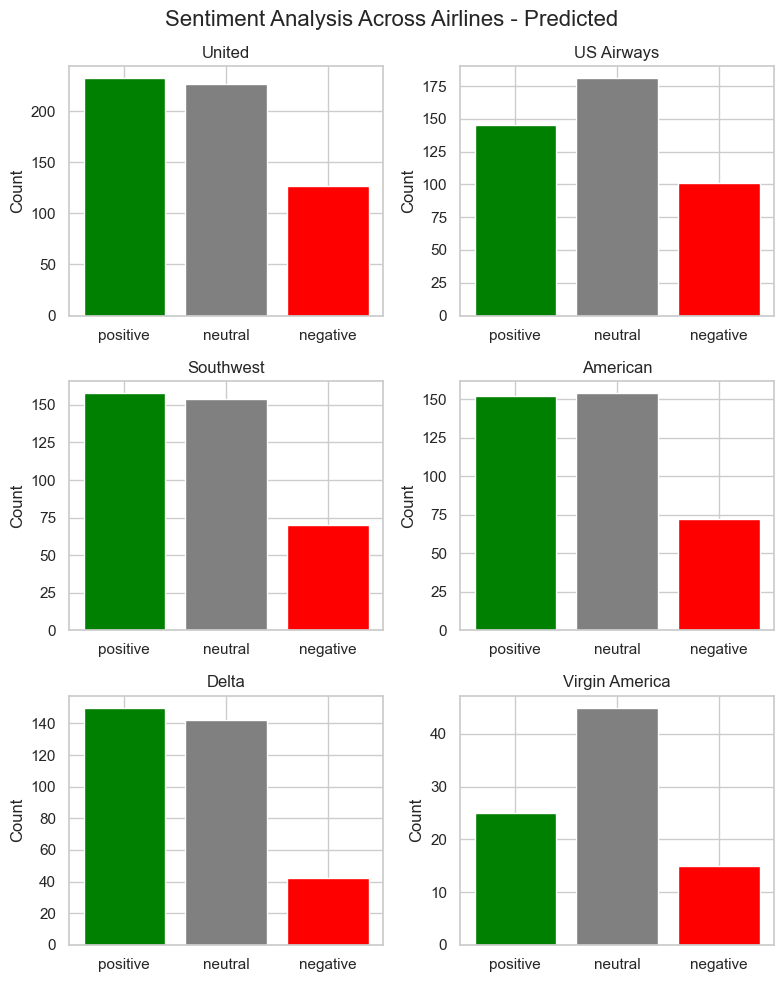

In [ ]:
import matplotlib.pyplot as plt

# my data
pred_results_airline = {'United': {'positive': 232, 'neutral': 226, 'negative': 127},
                        'US Airways': {'positive': 145, 'neutral': 181, 'negative': 101},
                        'Southwest': { 'positive': 158, 'neutral': 154,'negative': 70},
                        'American': {'positive': 152, 'neutral': 154, 'negative': 72},
                        'Delta': { 'positive': 150, 'neutral': 142,'negative': 42},
                        'Virgin America': { 'positive': 25, 'neutral': 45,'negative': 15}}

# Create a DataFrame from the results dictionary


# Create a grid of 6 plots
fig, axs = plt.subplots(3, 2, figsize=(8, 10))
fig.suptitle('Sentiment Analysis Across Airlines - Predicted', fontsize=16)

# Flatten the Axes array
axs = axs.flatten()

# Loop over the data and create a bar plot on each Axes
for ax, (airline, sentiments) in zip(axs, pred_results_airline.items()):
    ax.bar(sentiments.keys(), sentiments.values(), color=['green', 'gray', 'red'])
    ax.set_title(airline)
    ax.set_ylabel('Count')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
# get numbers for actual label each airline
airline_label_summary_actual = {}

for index in range(X_test.shape[0]):
    actual_labels = labels[y_test[index][0]]
    airline = df_clean.iloc[X_test.index[index]]['airline']

    if not airline_label_summary_actual.get(airline):
        airline_label_summary_actual[airline] = {actual_labels: 1}
    else:
        airline_label_summary_actual[airline][actual_labels] = airline_label_summary_actual[airline].get(actual_labels, 0) + 1


print(airline_label_summary_actual)


{'United': {'positive': 212, 'neutral': 216, 'negative': 157}, 'US Airways': {'negative': 122, 'positive': 132, 'neutral': 173}, 'Southwest': {'neutral': 149, 'positive': 153, 'negative': 80}, 'American': {'neutral': 151, 'negative': 81, 'positive': 146}, 'Delta': {'neutral': 127, 'positive': 153, 'negative': 54}, 'Virgin America': {'negative': 16, 'neutral': 44, 'positive': 25}}


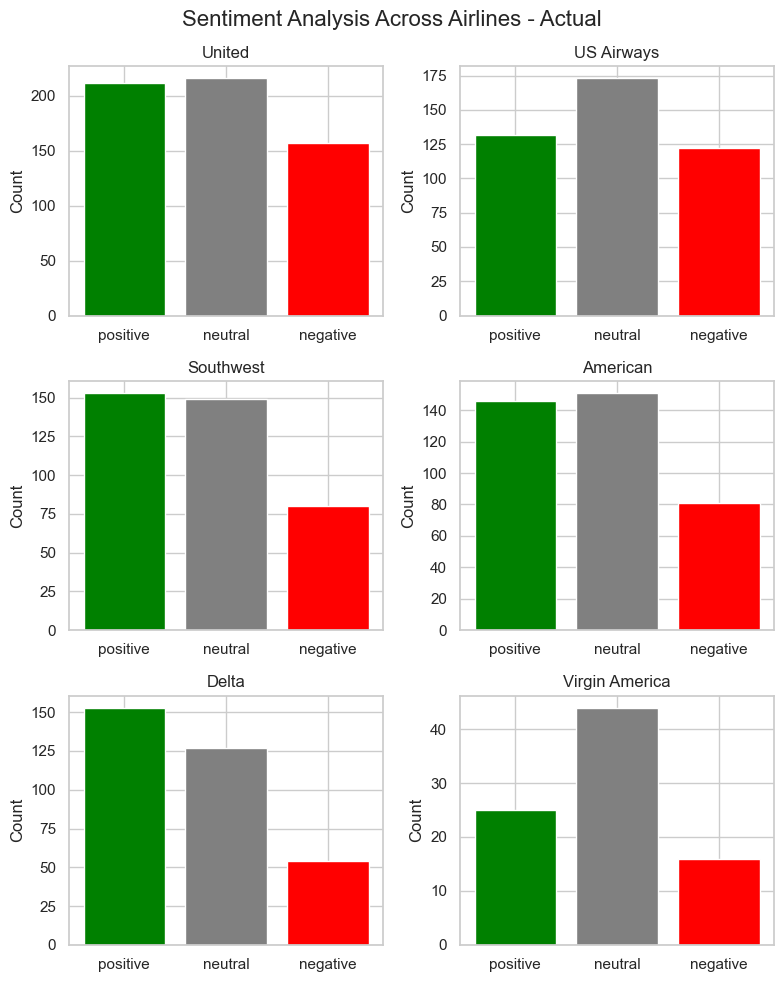

In [ ]:

pred_results_airline = {'United': {'positive': 232, 'neutral': 226, 'negative': 127},
                        'US Airways': {'positive': 145, 'neutral': 181, 'negative': 101},
                        'Southwest': { 'positive': 158, 'neutral': 154,'negative': 70},
                        'American': {'positive': 152, 'neutral': 154, 'negative': 72},
                        'Delta': { 'positive': 150, 'neutral': 142,'negative': 42},
                        'Virgin America': { 'positive': 25, 'neutral': 45,'negative': 15}}

actual_results_airline = {'United': {'positive': 212, 'neutral': 216, 'negative': 157},
                          'US Airways': { 'positive': 132, 'neutral': 173, 'negative': 122},
                          'Southwest': { 'positive': 153, 'neutral': 149,'negative': 80},
                          'American': {'positive': 146, 'neutral': 151, 'negative': 81},
                          'Delta': {'positive': 153,'neutral': 127, 'negative': 54},
                          'Virgin America': {'positive': 25, 'neutral': 44, 'negative': 16}}


# Create a grid of 6 plots
fig, axs = plt.subplots(3, 2, figsize=(8, 10))
fig.suptitle('Sentiment Analysis Across Airlines - Actual', fontsize=16)

# Flatten the Axes array
axs = axs.flatten()

# Loop over the data and create a bar plot on each Axes
for ax, (airline, sentiments) in zip(axs, actual_results_airline.items()):
    ax.bar(sentiments.keys(), sentiments.values(), color=['green', 'gray', 'red'])
    ax.set_title(airline)
    ax.set_ylabel('Count')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()



In [ ]:
# Create DataFrames
actual_df = pd.DataFrame(actual_results_airline).transpose()
pred_df = pd.DataFrame(pred_results_airline).transpose()

# Calculate the difference between positive and negative for actual and predicted data
actual_df['positive_minus_negative'] = actual_df['positive'] - actual_df['negative']
pred_df['positive_minus_negative'] = pred_df['positive'] - pred_df['negative']

# Rename columns for clarity
actual_df.columns = ['actual_positive', 'actual_neutral', 'actual_negative', 'positive_minus_negative']
pred_df.columns = ['pred_positive', 'pred_neutral', 'pred_negative', 'positive_minus_negative']

# Merge DataFrames on the 'airlines' column
result_df = pd.merge(actual_df, pred_df, left_index=True, right_index=True, suffixes=('_actual', '_pred'))

# Display the resulting DataFrame
result_df.sort_values(by='positive_minus_negative_pred', ascending=False)

,actual_positive,actual_neutral,actual_negative,positive_minus_negative_actual,pred_positive,pred_neutral,pred_negative,positive_minus_negative_pred
Delta,153,127,54,99,150,142,42,108
United,212,216,157,55,232,226,127,105
Southwest,153,149,80,73,158,154,70,88
American,146,151,81,65,152,154,72,80
US Airways,132,173,122,10,145,181,101,44
Virgin America,25,44,16,9,25,45,15,10


In [ ]:
print("Results before modellin: ")
sentiment_counts_sorted

Results before modellin: 


,Airline,Positive,Negative,Result,Neutral (Polarity = 0),Neutral Weigth (%),Subjectivity,Subjectivity Weigth (%)
3,Delta,971,351,620,900,40.504050,800,36.003600
2,Southwest,1027,458,569,935,38.636364,823,34.008264
1,United,1383,999,384,1440,37.676609,1243,32.522240
5,American,973,644,329,1103,40.551471,976,35.882353
0,Virgin America,223,68,155,213,42.261905,188,37.301587
4,US Airways,933,851,82,1129,38.757295,976,33.504978


> #  - ** `Conclusion`**.

Customer experience is a dynamic interplay of numerous factors, and its intricacies are captured through our predictive modeling. Prior to modeling, Delta emerged as the preferred airline, attributed to its comprehensive customer service, competitive fares, and reliable and timely flight information. Conversely, US Airways consistently ranked as the least favored option, highlighting areas for potential enhancement.

The GRU model, our top performer with a commendable 92% accuracy, effectively predicts positive and negative sentiments. However, the notably higher count of neutral instances prompts consideration for potential impacts on model performance, urging exploration into data augmentation or hyperparameter engineering.

Further investigation into the disparities between actual and predicted data, as illustrated in the confusion matrix, unveils a crucial area for deeper research. Notably, United stands out with the highest counts of both actual positives and negatives, suggesting a polarized sentiment—perhaps indicative of an isolated event warranting closer scrutiny.

Conversely, Southwest consistently demonstrates balanced and reliable results, reflecting a customer base comfortable and satisfied with the airline. These insights not only underscore the predictive capabilities of our GRU model but also pinpoint areas for refinement and exploration in our ongoing pursuit of understanding and enhancing the customer experience landscape. `(197 words)`
